In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import tensorly as tl
from tensorly.decomposition import tucker
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [3]:
data = pd.read_csv('ratings.txt')
data=data.dropna()
data['rating']=data['rating']/5
data = data.sort_values(by=['userid', 'itemid'])

In [4]:
dataplot = data.copy()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataplot.iloc[:,4] = le.fit_transform(dataplot.iloc[:,4])
dataplot.iloc[:,5] = le.fit_transform(dataplot.iloc[:,5])
dataplot.iloc[:,3] = le.fit_transform(dataplot.iloc[:,3])
data2=dataplot.copy()
dataplot.iloc[:,1] = le.fit_transform(dataplot.iloc[:,1])

In [5]:
data2.head()

,userid,itemid,rating,Time,Location,Companion
723,1001,tt0088763,0.6,1,0,1
731,1001,tt0088763,0.8,1,0,2
721,1001,tt0111161,0.4,1,0,1
729,1001,tt0111161,0.6,1,0,2
737,1001,tt0120338,0.2,1,1,0


In [6]:
user_id = data2['userid'].unique()
item_id = data2['itemid'].unique()
location = data2['Location'].unique()
companion = data2['Companion'].unique()
time = data2['Time'].unique()

In [7]:
user_id

array([1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1011, 1014,
       1015, 1016, 1018, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033,
       1034, 1035, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045,
       1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056,
       1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067,
       1068, 1069, 1070, 1071, 1074, 1075, 1076, 1077, 1078, 1079, 1082,
       1084, 1087, 1097, 1098, 1105, 1107, 1109, 1112, 1113, 1114, 1115,
       1116, 1119, 1120, 1122], dtype=int64)

In [8]:
def mapping(ids):
    count = 0
    keys_u = ids
    map_array = {}
    for i in keys_u:
        map_array[i] = count
        count = count + 1
    return map_array

In [9]:
map_users = mapping(user_id)
map_items = mapping(item_id)
map_loc = mapping(location)
map_tim = mapping(time)
map_com = mapping(companion)

In [10]:
tensor4d1 = np.zeros([len(user_id),len(item_id),len(location),len(companion)])
tensor4d2 = np.zeros([len(user_id),len(item_id),len(location),len(time)])
tensor4d3 = np.zeros([len(user_id),len(item_id),len(time),len(companion)])

In [11]:
for i in range(data2.shape[0]):
    idx1 = map_users[data2.iloc[i,0]]
    idx2 = map_items[data2.iloc[i,1]]
    idx3 = map_loc[data2.iloc[i,4]]
    idx4 = map_com[data2.iloc[i,5]]
    rat = data2.iloc[i,2]
    tensor4d1[idx1,idx2,idx3,idx4] = rat

In [12]:
for i in range(data2.shape[0]):
    idx1 = map_users[data2.iloc[i,0]]
    idx2 = map_items[data2.iloc[i,1]]
    idx3 = map_loc[data2.iloc[i,4]]
    idx4 = map_tim[data2.iloc[i,3]]
    rat = data2.iloc[i,2]
    tensor4d2[idx1,idx2,idx3,idx4] = rat

In [13]:
for i in range(data2.shape[0]):
    idx1 = map_users[data2.iloc[i,0]]
    idx2 = map_items[data2.iloc[i,1]]
    idx3 = map_tim[data2.iloc[i,3]]
    idx4 = map_com[data2.iloc[i,5]]
    rat = data2.iloc[i,2]
    tensor4d3[idx1,idx2,idx3,idx4] = rat

In [14]:
factors4d1 = tucker(tensor4d1 , ranks=[35,35,2,2])
factors4d2 = tucker(tensor4d2 , ranks=[35,35,2,2])
factors4d3 = tucker(tensor4d3 , ranks=[35,35,2,2])

In [15]:
U1 = factors4d1[1][0]
U2 = factors4d2[1][0]
U3 = factors4d3[1][0]

In [16]:
wcss1 = []
for i in range(1,81):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(U1)
    wcss1.append(kmeans.inertia_)

In [17]:
wcss2 = []
for i in range(1,81):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(U2)
    wcss2.append(kmeans.inertia_)

In [18]:
wcss3 = []
for i in range(1,81):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(U3)
    wcss3.append(kmeans.inertia_)

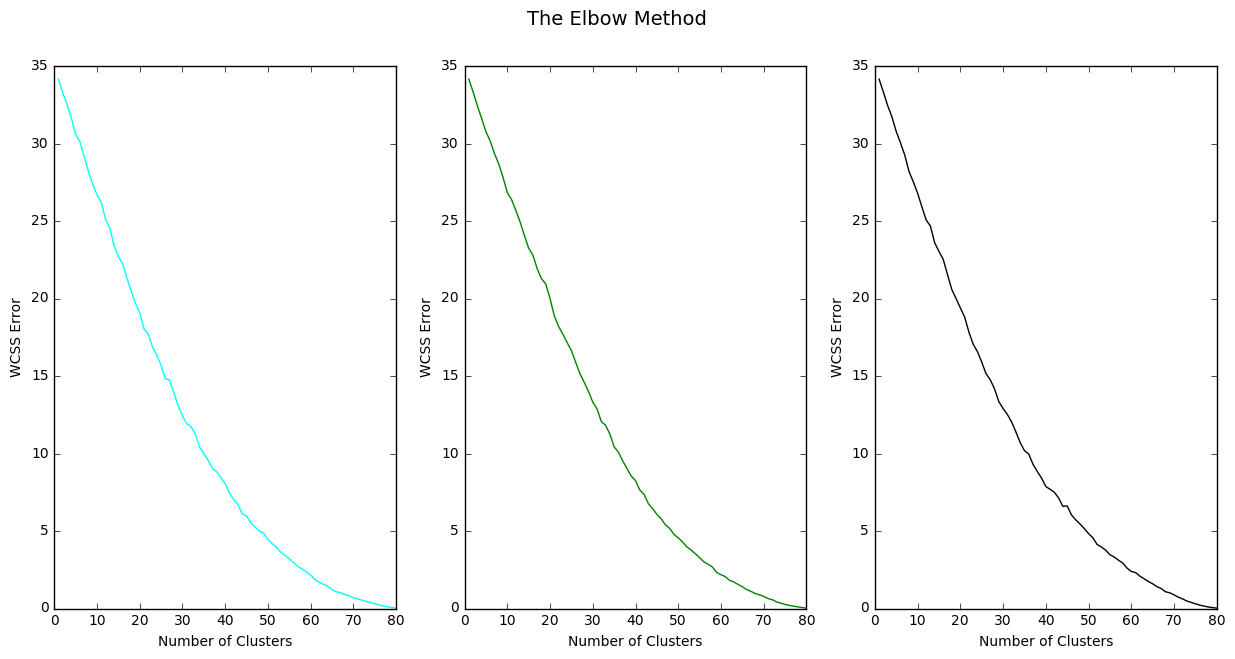

In [19]:
fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(15,7))
fig.suptitle("The Elbow Method", fontsize=14)
ax1.plot(range(1, 81), wcss1, color="cyan")
ax2.plot(range(1, 81), wcss2, color="green")
ax3.plot(range(1, 81), wcss3, color="black")
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
ax1.set(xlabel="Number of Clusters", ylabel="WCSS Error")
ax2.set(xlabel="Number of Clusters", ylabel="WCSS Error")
ax3.set(xlabel="Number of Clusters", ylabel="WCSS Error")

In [20]:
kmeans = KMeans(n_clusters=33, random_state=0)
yy1 = kmeans.fit_predict(U1)
kmeans = KMeans(n_clusters=35, random_state=0)
yy2 = kmeans.fit_predict(U1)
kmeans = KMeans(n_clusters=34, random_state=0)
yy3 = kmeans.fit_predict(U1)
kmeans = KMeans(n_clusters=42, random_state=0)
yy4 = kmeans.fit_predict(U1)

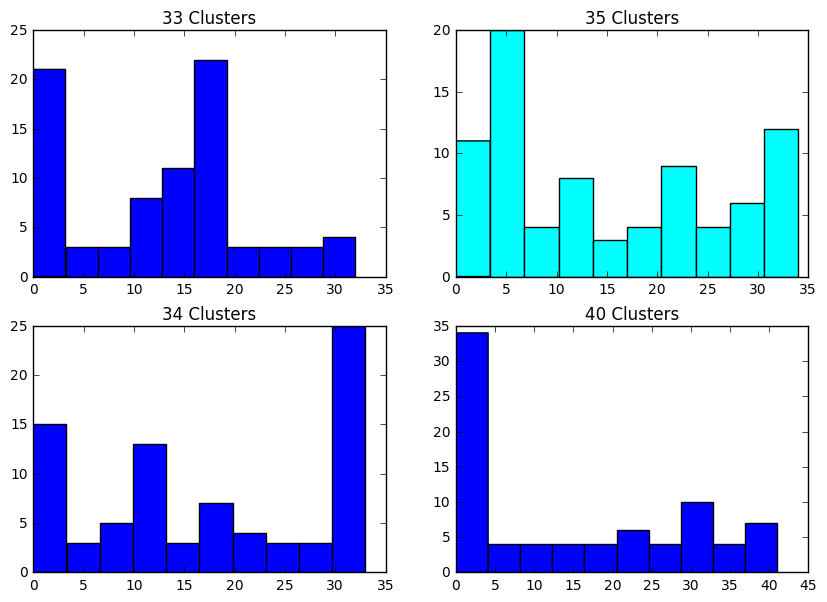

In [21]:
fig, ax = plt.subplots(2,2, figsize=(10, 7))
ax[0,0].hist(yy1)
ax[0,0].set_title("33 Clusters")
ax[0,1].hist(yy2, color='cyan')
ax[0,1].set_title("35 Clusters")
ax[1,0].hist(yy3)
ax[1,0].set_title("34 Clusters")
ax[1,1].hist(yy4)
ax[1,1].set_title("40 Clusters")

In [22]:
kmeans = KMeans(n_clusters=30, random_state=0)
yy5 = kmeans.fit_predict(U2)
kmeans = KMeans(n_clusters=31, random_state=0)
yy6 = kmeans.fit_predict(U2)
kmeans = KMeans(n_clusters=32, random_state=0)
yy7 = kmeans.fit_predict(U2)
kmeans = KMeans(n_clusters=33, random_state=0)
yy8 = kmeans.fit_predict(U2)

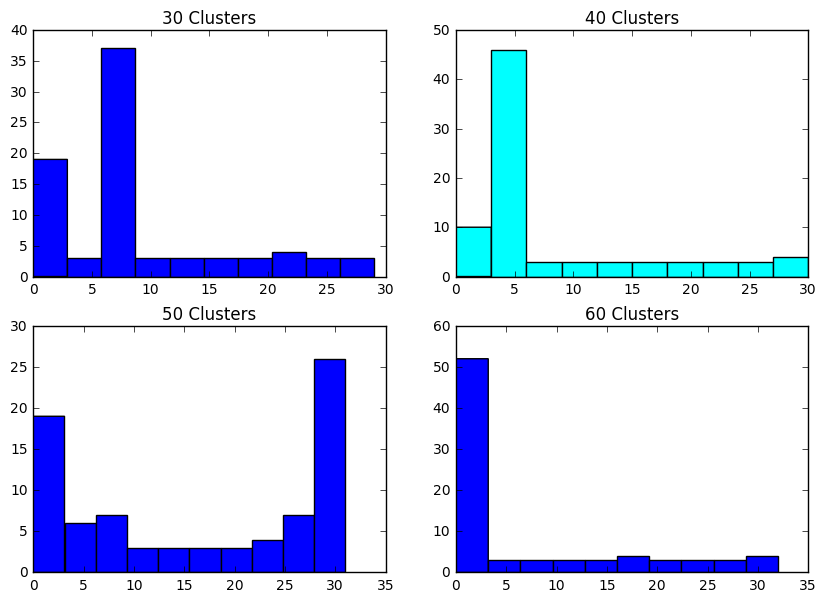

In [23]:
fig, ax = plt.subplots(2,2, figsize=(10, 7))
ax[0,0].hist(yy5)
ax[0,0].set_title("30 Clusters")
ax[0,1].hist(yy6, color='cyan')
ax[0,1].set_title("40 Clusters")
ax[1,0].hist(yy7)
ax[1,0].set_title("50 Clusters")
ax[1,1].hist(yy8)
ax[1,1].set_title("60 Clusters")

In [24]:
kmeans = KMeans(n_clusters=30, random_state=0)
yy9 = kmeans.fit_predict(U3)
kmeans = KMeans(n_clusters=40, random_state=0)
yy10 = kmeans.fit_predict(U3)
kmeans = KMeans(n_clusters=45, random_state=0)
yy11 = kmeans.fit_predict(U3)
kmeans = KMeans(n_clusters=50, random_state=0)
yy12 = kmeans.fit_predict(U3)

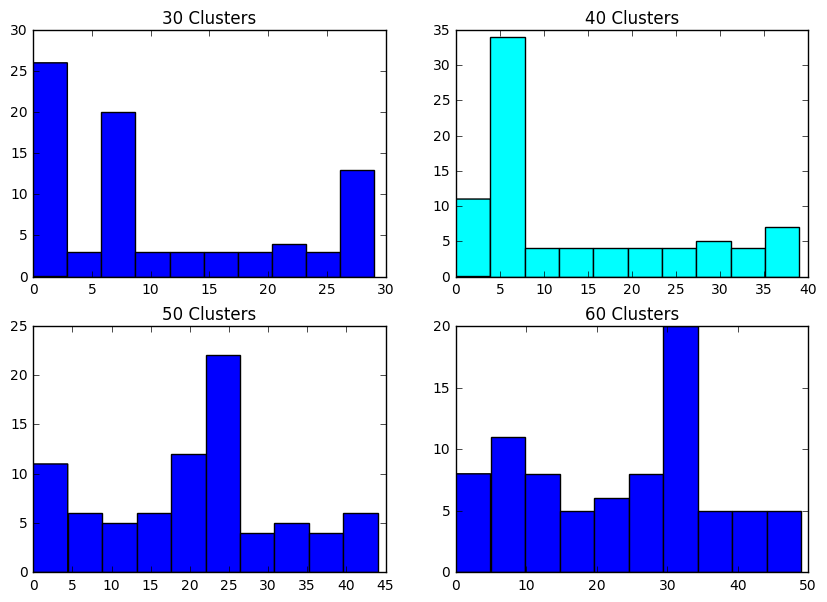

In [25]:
fig, ax = plt.subplots(2,2, figsize=(10, 7))
ax[0,0].hist(yy9)
ax[0,0].set_title("30 Clusters")
ax[0,1].hist(yy10, color='cyan')
ax[0,1].set_title("40 Clusters")
ax[1,0].hist(yy11)
ax[1,0].set_title("50 Clusters")
ax[1,1].hist(yy12)
ax[1,1].set_title("60 Clusters")

### Recommendation Function

In [26]:
def Recc(current_user,current_context1,current_context2,y2,map_1,map_2,tensor4d):
    index_user = map_users[current_user]
    cluster_user = y2[index_user]
    sim_user_id = []
    for i in range(len(y2)):
        if(y2[i]==cluster_user and user_id[i]!=current_user):
            sim_user_id.append(user_id[i])
    sim_user_id.append(current_user)
    index_context1 = map_1[current_context1]
    index_context2 = map_2[current_context2]
    matrix_context = tensor4d[:,:,index_context1,index_context2]
    cluster=[]
    
    # Finding similar users to current user
    
    for i in range(len(user_id)):
        if y2[i]==cluster_user and i!=index_user :
            cluster.append(i)
    similar_users = []
    for i in cluster:
        similar_users.append(matrix_context[i])
    su = similar_users.copy()
    su.append(matrix_context[map_users[current_user]])
    similar_users = np.array(similar_users)
    relevant_items=[]
    count = 0
    for i in range(len(item_id)):
        for j in range(len(cluster)):
            if(similar_users[j][i]>0.5):
                count = count + 1
        relevant_items.append(count)
        count = 0
        
    # Finding Recommendations
    
    itemx=[]
    for i in range(len(relevant_items)):
        temp=[]
        temp.append(item_id[i])
        temp.append(relevant_items[i])
        itemx.append(temp)
    itemx = np.array(itemx)
    itemx = itemx[itemx[:,1].argsort()[::-1]]
    sim_user_id = sim_user_id[:-1]
    su_mean=[]
    count=0
    mean=0
    for i in range(len(su)):
        for j in range(len(item_id)):
            if su[i][j]:
                count = count + 1
                mean = mean + su[i][j]
        if count and mean:
            su_mean.append(mean/count)
        else:
            su_mean.append(0)
        mean=0
        count=0
        
    corr_matrix=[]
    corr_m = []
    sumxy=0
    sumyy2=0
    sumxx2=0
    corr=0
    for i in range(len(su)):
        for j in range(len(su)):
            for k in range(len(item_id)):
                if su[i][k] and su[j][k]:
                    sumxy= sumxy + (su[i][k]-su_mean[i])*(su[j][k]-su_mean[j])
                    sumxx2= sumxx2 + (su[i][k]-su_mean[i])*(su[i][k]-su_mean[i])
                    sumyy2= sumyy2 + (su[j][k]-su_mean[j])*(su[j][k]-su_mean[j])
            if sumxx2 and sumyy2:
                corr=sumxy/math.sqrt(sumxx2*sumyy2)
            else:
                corr=0
            corr_m.append(corr)
            sumxy=0
            sumyy2=0
            sumxx2=0
        corr_matrix.append(corr_m)
        corr_m = []
    corr_matrix = np.array(corr_matrix)
    su=np.array(su)
    similarities = corr_matrix[len(corr_matrix)-1]
    su_mean=[]
    count=0
    mean=0
    for i in range(len(su)):
        for j in range(len(item_id)):
            if su[i][j]:
                count = count + 1
                mean = mean + su[i][j]
        if mean and count:
            su_mean.append(mean/count)
        else:
            su_mean.append(0)
        mean=0
        count=0
    predicted_ratings=[]

    for i in range(len(item_id)):
        temp = 0
        summ = 0
        for j in range(len(similar_users)):
            if similar_users[j][i]:
                summ = summ + similarities[j]
                temp = temp + (similarities[j]*(similar_users[j][i]-su_mean[j]))
        if summ:
            pred = su_mean[-1] + (temp/summ)
        else:
            pred = su_mean[-1] + temp
        if pred >1:
            pred = 1
        elif pred<=0:
            pred = 0.2

        predicted_ratings.append(pred)
    err = 0
    count = 0
    for i in range(len(su[len(su)-1])):
        if su[len(su)-1][i]:
            err = err + abs(su[len(su)-1][i]-predicted_ratings[i])
            count = count + 1
    if count:
        mae = err/count
    else:
        mae = 100000000000000
    
    return itemx[:10],su[len(su)-1],predicted_ratings,mae,corr_matrix,sim_user_id


In [27]:
#c1 = location
#c2 = time
#c3 = companion
def GiveRecommendations(curr_user,c1,c2,c3):
    
    items1 = Recc(curr_user,c1,c3,yy2,map_loc,map_com,tensor4d1)
    items2 = Recc(curr_user,c1,c2,yy7,map_loc,map_tim,tensor4d2)
    items3 = Recc(curr_user,c2,c3,yy10,map_tim,map_com,tensor4d3)
    
    return items1,items2,items3

In [42]:
import math
current_user = 1011
d1,d2,d3 = GiveRecommendations(current_user,0,1,1)
print(d1[3],d2[3],d3[3])

0.0666666666667 100000000000000 0.100345244997


In [53]:
ss = map_users[1011]
s1 = map_loc[0]
s2 = map_tim[1]
s2

0

In [54]:
matrix_context = tensor4d2[9,:,0,0]
matrix_context

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [90]:
rec = []
c_m = []
sm = []
su =[]
pr =[]
if d1[3] < d2[3] and d1[3] < d3[3]:
    rec = d1[0]
    c_m = d1[4]
    sm = d1[5]
    su = d1[1]
    pr = d1[2]
elif d2[3] < d1[3] and d2[3] < d3[3]:
    rec = d2[0]
    c_m = d2[4]
    sm = d2[5]
    su = d2[1]
    pr = d2[2]
else:
    rec = d3[0]
    c_m = d3[4]
    sm = d3[5]
    su = d3[1]
    pr = d3[2]
print(rec)

[['tt0133093' '7']
 ['tt3793764' '5']
 ['tt1375666' '5']
 ['tt0266543' '5']
 ['tt1657301' '4']
 ['tt0120338' '4']
 ['tt0120912' '4']
 ['tt0441773' '3']
 ['tt1055369' '3']
 ['tt0800369' '3']]


In [91]:
sm.append(current_user)

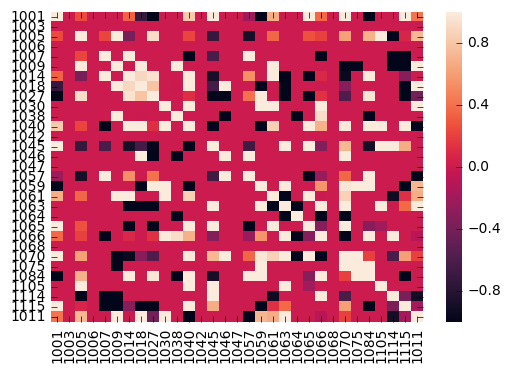

In [92]:
import seaborn as sns
sns.heatmap(c_m, xticklabels=sm, yticklabels=sm)

In [93]:
testsu = []
testpr = []
for i in range(len(su)):
    if su[i]:
        testsu.append(su[i])
        testpr.append(pr[i])

In [94]:
testsu = np.round([i*5 for i in testsu])
testpr = np.round([i*5 for i in testpr])

In [95]:
for i in range(len(testpr)):
    if testpr[i]==0:
        testpr[i]=1

In [96]:
testpr

array([ 4.,  1.,  5.,  4.,  3.,  5.,  2.,  3.,  5.,  5.,  3.])

In [97]:
testsu

array([ 4.,  2.,  5.,  4.,  3.,  5.,  2.,  2.,  4.,  4.,  3.])

In [98]:
item_plot =[]
for i in range(len(item_id)):
    if(su[i] and pr[i]):
        item_plot.append(item_id[i])

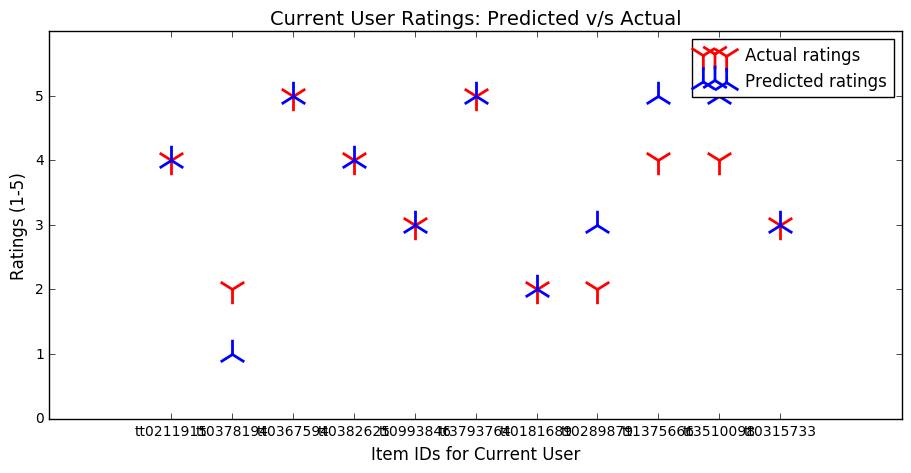

In [99]:
plt.figure(figsize=(11,5))
plt.scatter(np.arange(0,len(testsu)), testsu, s=450, color="red", marker='1', linewidth=2)
plt.scatter(np.arange(0,len(testpr)), testpr, s=450, marker='2', linewidth=2)
plt.xlabel("Item IDs for Current User", fontsize=12)
plt.xticks(np.arange(0,len(testsu)), item_plot)
plt.yticks(np.arange(0,6), [0,1,2,3,4,5])
plt.ylabel("Ratings (1-5)", fontsize=12)
plt.legend(["Actual ratings","Predicted ratings"])
plt.title("Current User Ratings: Predicted v/s Actual", fontsize=14)
plt.show()